<a href="https://colab.research.google.com/github/JacobaCarr26/personal-projects/blob/main/monte_carlo_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Integration
By Jacoba Carr

## Introduction

With this project, I wanted to see how computational methods can be a stronger way to find integrals for ill-behaved functions than analytical methods. The computational method I'm working with is Monte Carlo Integration. In it's simplest form, I throw a large number of random points uniformly throughout a graph, within certain parameters (a rectangle), and then count the number of points below the curve, divide that by the total number of points to find the ratio, and then multiply that by the area of the rectangle. This will give me a definite integral below the function, within those parameters.

First are my imports,
The libraries I'm using are matplotlib, numpy, and scipy:

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import RectBivariateSpline
from scipy.stats import multivariate_normal

Three functions I will be finding definite integrals for are:

f(x) = cos(x²)

g(x) = sin(x²)

h(x) = $e^{x^2}$

First, I'll find the definite integrals using Monte Carlo simulation with 1 million random points. To not take up too much computational power, I'll be finding the definite integral for the trig functions between the x-axis, x=-25 and x=25, and for $e^{x^2}$, I'll find the definite integral between the x-axis, x=-4 and x=4.

Following is the Monte Carlo class, containing the count_points and estimate_area methods, it's quite a simple thing for 2D functions.

In [ ]:
class MonteCarlo():

  def __init__(self, x_min, x_max, y_min, y_max, num_points, function):
    '''  x_min, x_max are x bounds for the random points
    y_min, y_max are y bounds for the random points
    num_points is the amount of randomly generated points
    precondition: function must be a function with one parameter'''
    self.x_min = x_min
    self.x_max = x_max
    self.y_min = y_min
    self.y_max = y_max
    self.num_points = num_points
    self.function = function

  def count_points(self):
    ''' Counts the number of points under the curve'''
    random_x = np.random.uniform(self.x_min, self.x_max, self.num_points)
    random_y = np.random.uniform(self.y_min, self.y_max, self.num_points)
    y = self.function(random_x)
    return(np.sum(random_y <= y))

  def estimate_area(self):
    ''' Finds ratio of points under the curve to total points and uses that to estimate definite integral'''
    ratio = self.count_points() / self.num_points
    return(ratio * (self.x_max - self.x_min) * (self.y_max - self.y_min))


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


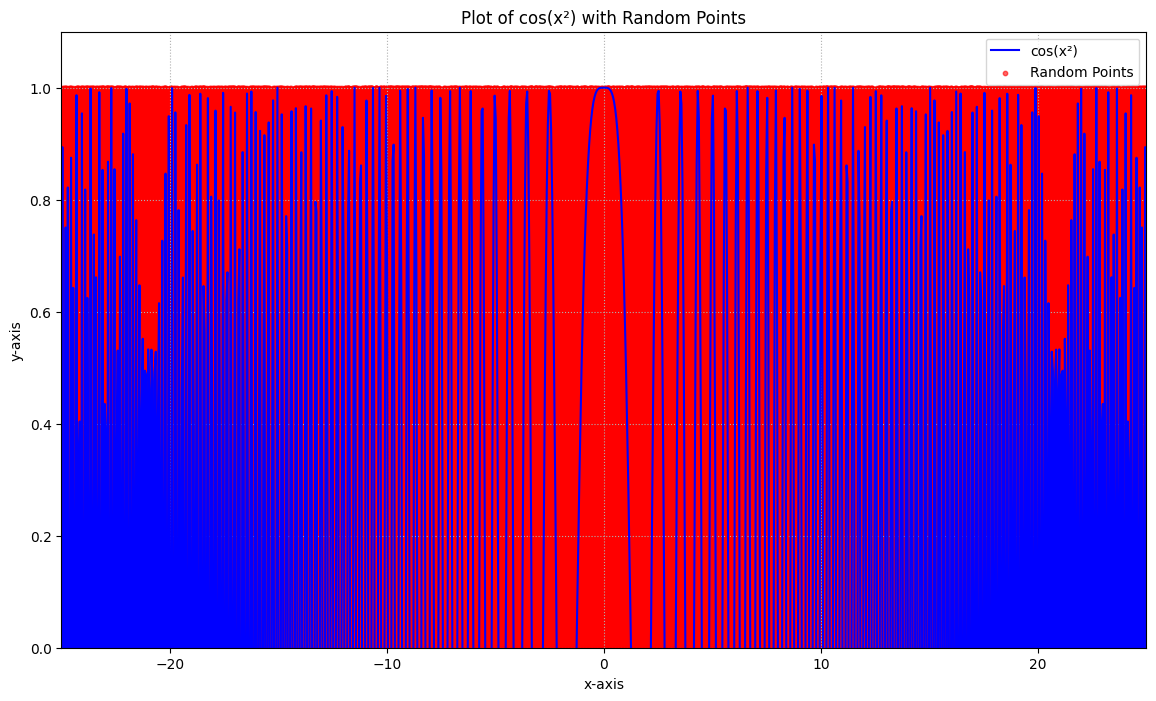

334312
16.68705


In [ ]:
# Define function f(x)
def f(x):
  ''' Returns the function sin(x²) '''
  return np.cos(x**2)

# Define rectangle bounds
x_min, x_max = -25, 25
y_min, y_max = 0, 1

# Generate random points (just for graphing)
num_points = 10**6
random_x = np.random.uniform(x_min, x_max, num_points)
random_y = np.random.uniform(y_min, y_max, num_points)

# Plot setup
x = np.linspace(-25, 25, 1000)
fig, ax = plt.subplots(figsize=(14, 8))

# Plot f(x)
ax.plot(x, f(x), 'b', label=r'cos(x²)')

# Plot random points
ax.scatter(random_x, random_y, color='red', s=10, alpha=0.6, label="Random Points")

# Add features
ax.legend()
ax.grid(True, linestyle=':')
ax.set_xlim([-25, 25])
ax.set_ylim([0, 1.1])

ax.set_title('Plot of cos(x²) with Random Points')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

# Show plot
plt.show()

# Find the definite integral between -25 and 25!
fmontecarlo = MonteCarlo(x_min, x_max, y_min, y_max, num_points, f)
print(fmontecarlo.count_points())
print(fmontecarlo.estimate_area())

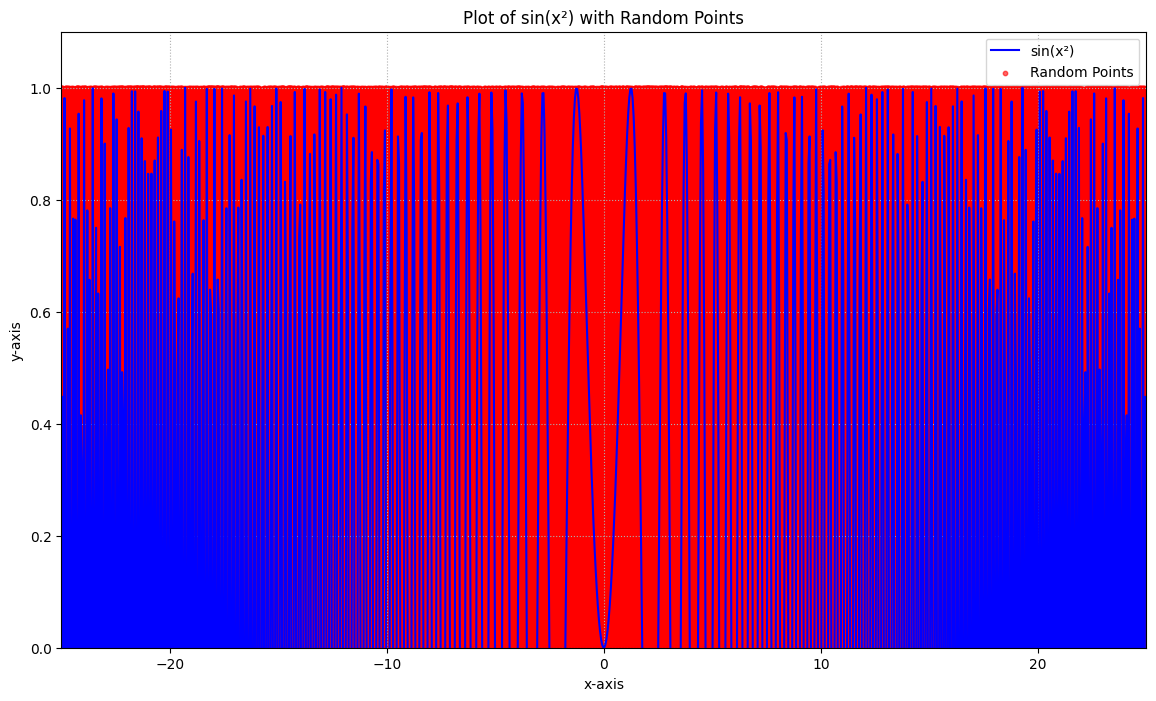

326565
16.3188


In [ ]:
# Define function g(x)
def g(x):
  ''' Returns the function sin(x²) '''
  return np.sin(x**2)

# Define rectangle bounds
x_min, x_max = -25, 25
y_min, y_max = 0, 1

# Generate random points (just for graphing)
num_points = 10**6
random_x = np.random.uniform(x_min, x_max, num_points)
random_y = np.random.uniform(y_min, y_max, num_points)

# Plot setup
x = np.linspace(-25, 25, 1000)
fig, ax = plt.subplots(figsize=(14, 8))

# Plot g(x)
ax.plot(x, g(x), 'b', label=r'sin(x²)')

# Plot random points
ax.scatter(random_x, random_y, color='red', s=10, alpha=0.6, label="Random Points")

# Add features
ax.legend()
ax.grid(True, linestyle=':')
ax.set_xlim([-25, 25])
ax.set_ylim([0, 1.1])

ax.set_title('Plot of sin(x²) with Random Points')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

# Show plot
plt.show()

# Find the definite integral between -25 and 25!
gmontecarlo = MonteCarlo(x_min, x_max, y_min, y_max, num_points, g)
print(gmontecarlo.count_points())
print(gmontecarlo.estimate_area())

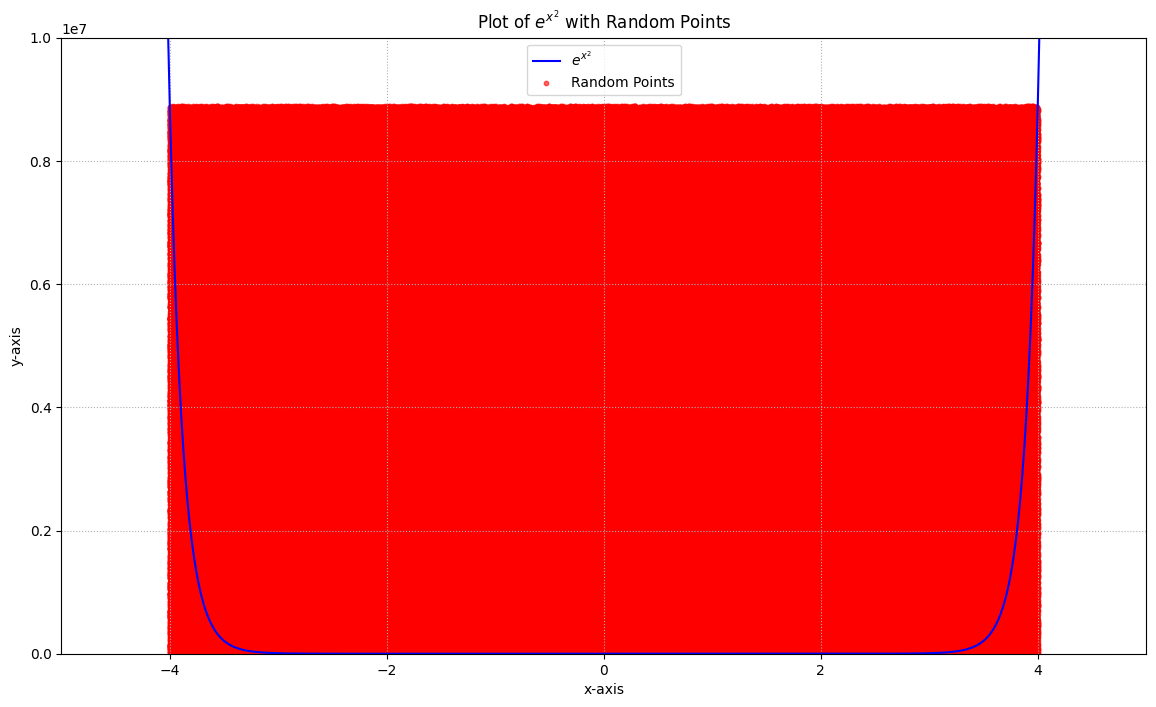

32332
2307687.3577338103


In [ ]:
# Define function h(x)
def h(x):
  ''' Returns the function e^(x^2) '''
  return np.e**(x**2)

# Define rectangle bounds
x_min, x_max = -4, 4
y_min, y_max = 0, h(4)

# Generate random points (just for graphing)
num_points = 10**6
random_x = np.random.uniform(x_min, x_max, num_points)
random_y = np.random.uniform(y_min, y_max, num_points)

# Plot setup
x = np.linspace(-5, 5, 500)
fig, ax = plt.subplots(figsize=(14, 8))

# Plot h(x)
ax.plot(x, h(x), 'b', label=r'$e^{x^2}$')

# Plot random points
ax.scatter(random_x, random_y, color='red', s=10, alpha=0.6, label="Random Points")

# Add features
ax.legend()
ax.grid(True, linestyle=':')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 10**7])

ax.set_title('Plot of $e^{x^2}$ with Random Points')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

# Show plot
plt.show()

# Find the definite integral between -4 and 4!
hmontecarlo = MonteCarlo(x_min, x_max, y_min, y_max, num_points, h)
print(hmontecarlo.count_points())
print(hmontecarlo.estimate_area())

So from this, we know the approximate area between the x-axis and our arbitrary boundaries are:

For f(x) = cos(x²), with bounds x=-25, x=25, ~16.7

For g(x) = sin(x²), with bounds x=-25, x=25, ~16.3

For h(x) = $e^{x^2}$, with bounds x=-4, x=4, ~2.3 million

Of course, these estimations can be improved with more random points.

## Applications

What can we do with this method? Well, we can use it to estimate the integrals for scientific phenomena that present themselves with ill-behaved functions.

For example: The Navier-Stokes equation in turbulent regimes

I'm not very familiar with Navier-Stokes so I'm just going to do a simplified version, graphing kinetic energy, but I'm sure the Monte Carlo method can be extended to the full Navier-Stokes equation. In this example, the integral is just representing total kinetic energy.

But first, since it's a three variable equation, I'll create a 3D Monte Carlo class that inherits from the 2D one. The count_points_3D and estimate_volume methods look a little different from the original 2D ones. This is because the function is taking two parameters, and thus needs to be treated as such. It's still the same idea as the 2D version, though.

In [ ]:
class MonteCarlo3D(MonteCarlo):
  def __init__(self, x_min, x_max, y_min, y_max, z_min, z_max, num_points, function):
    ''' inherits from MonteCarlo class
    z_min and z_max are the z bounds for the random points
    precondition: function must be a function with 2 parameters'''
    super().__init__(x_min, x_max, y_min, y_max, num_points, function)
    self.z_min = z_min
    self.z_max = z_max

  def count_points_3D(self):
    '''Counts the number of points inside a 3D volume where z <= function(x, y)
    Preconditions: the function must take x and y as inputs'''
    random_x = np.random.uniform(self.x_min, self.x_max, self.num_points)
    random_y = np.random.uniform(self.y_min, self.y_max, self.num_points)
    random_z = np.random.uniform(self.z_min, self.z_max, self.num_points)

		# Compute function(x, y) dynamically using sampled x, y points
    f_vals = np.array([self.function(xi, yi) for xi, yi in zip(random_x, random_y)])

    return np.sum(random_z <= f_vals)

  def estimate_volume(self):
    '''Monte Carlo estimation for 3D volume under a function'''
    ratio = self.count_points_3D() / self.num_points
    return ratio * (self.x_max - self.x_min) * (self.y_max - self.y_min) * (self.z_max - self.z_min)

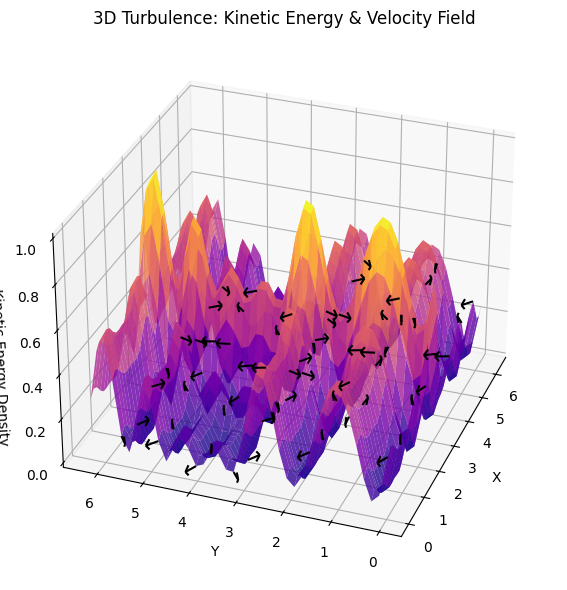

The approximate total kinetic energy in this example is 11.11 Joules


In [ ]:
# This graph will be of a randomized kinetic energy density function

# Grid definition
nx, ny = 40, 40
x = np.linspace(0, 2 * np.pi, nx)
y = np.linspace(0, 2 * np.pi, ny)
X, Y = np.meshgrid(x, y)

# Synthetic turbulent velocity field (randomized Fourier components)
N = 5  # Number of waves
np.random.seed(42)
A = np.random.rand(N) * 2  # Amplitudes
k = np.arange(1, N + 1)  # Wave numbers

Vx = np.zeros_like(X)
Vy = np.zeros_like(Y)

for i in range(N):
	Vx += A[i] * np.sin(k[i] * X + np.random.rand() * 2 * np.pi)
	Vy += A[i] * np.cos(k[i] * Y + np.random.rand() * 2 * np.pi)

# Normalize velocity components
Vx /= np.max(np.abs(Vx))
Vy /= np.max(np.abs(Vy))

# Create interpolation functions for Vx and Vy
Vx_interp = RectBivariateSpline(x, y, Vx.T)
Vy_interp = RectBivariateSpline(x, y, Vy.T)

# Define kinetic energy density function dynamically
def E_dynamic(x, y):
	Vx_sampled = Vx_interp(x, y)[0, 0]
	Vy_sampled = Vy_interp(x, y)[0, 0]
	return 0.5 * (Vx_sampled**2 + Vy_sampled**2)

# Create 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

E_vals = np.array([[E_dynamic(xi, yi) for yi in y] for xi in x])

# Plot the 3D surface for kinetic energy
ax.plot_surface(X, Y, E_vals, cmap='plasma', edgecolor='none', alpha=0.8)

# Overlay velocity vectors as 3D quiver plot
stride = 5  # Reduce density of arrows for clarity
ax.quiver(X[::stride, ::stride], Y[::stride, ::stride], E_vals[::stride, ::stride],
          Vx[::stride, ::stride], Vy[::stride, ::stride], np.zeros_like(Vx[::stride, ::stride]),
          color='k', length=0.3, normalize=True)
# Including the vectors just for visualization, they are not involved in the integration

# Labels and view angle
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Kinetic Energy Density")
ax.set_title("3D Turbulence: Kinetic Energy & Velocity Field")
ax.view_init(elev=30, azim=200)  # Adjust viewing angle
plt.tight_layout()
plt.show()

# So let's find the integral
# We're not graphing the rectangle (or in this case rectangular prism) this time since it will just cover the graph of the function
eMonteCarlo = MonteCarlo3D(0, 2 * np.pi, 0, 2 * np.pi, 0, 1, 10**6, E_dynamic)
print(f"The approximate total kinetic energy in this example is {round(eMonteCarlo.estimate_volume(), 2)} Joules")

Another application of this method is the gaussian or 'normal' distribution. While it is possible to find integrals using a calculator, why not show the capability of the Monte Carlo method here as well? More interstingly, let's look at overlapping distributions.

In particular, 3D normal distributions! This example will be plotting colour distributions of images with the axes being RGB. In this example, I'll be finding the integral between a ripe banana and unripe banana colour normal pdfs. Banana colour will follow an approximately normal distribution because of many small random variations and the CLT. This will tell me the probability that an unripe and ripe banana shares the same colour, and thereby the probability that you pick what you think is a ripe banana that is actually unripe or vice versa.

Since we're switching from xyz to RGB, and using two pdfs rather than one function, I'll be defining a new Monte Carlo class. In this one the idea is slightly different, using np.min and np.sum to find the total number of points that fall beneath both functions, in the overlap space, and since this one is a pdf, we just divide out the total volume of the two functions, found by the basic monte carlo method from the whole space defined by the maximum RGB values. This will produce a probability, a number between 0 and 1.

In [ ]:
# For this example we have a function of 3 variables so we must make another monte carlo class
# And for readability sake, let's change the variable names to RBG - so this one won't inherit at all

class MonteCarloRGB:
  def __init__(self, r_min, r_max, g_min, g_max, b_min, b_max, num_points, function1, function2):
    '''Monte Carlo integration for 3D probability densities.'''
    self.r_min, self.r_max = r_min, r_max
    self.g_min, self.g_max = g_min, g_max
    self.b_min, self.b_max = b_min, b_max
    self.num_points = num_points
    self.function1 = function1
    self.function2 = function2

  def count_points_3D(self):
    '''Counts the overlapping probability desnity contributions.'''
    random_R = np.random.uniform(self.r_min, self.r_max, self.num_points)
    random_G = np.random.uniform(self.g_min, self.g_max, self.num_points)
    random_B = np.random.uniform(self.b_min, self.b_max, self.num_points)

    ripe_vals = np.array([self.function1(R, G, B) for R, G, B in zip(random_R, random_G, random_B)])
    unripe_vals = np.array([self.function2(R, G, B) for R, G, B in zip(random_R, random_G, random_B)])

    overlap_sum = np.sum(np.minimum(ripe_vals, unripe_vals))
    return overlap_sum

  def estimate_probability(self):
    '''Computes the total probability mass and normalizes the result'''
    overlap_sum = self.count_points_3D()
    total_volume = np.sum([
    self.function1(R, G, B) + self.function2(R, G, B) - min(self.function1(R, G, B), self.function2(R, G, B))
    for R, G, B in zip(
      np.random.uniform(self.r_min, self.r_max, self.num_points),
      np.random.uniform(self.g_min, self.g_max, self.num_points),
      np.random.uniform(self.b_min, self.b_max, self.num_points)
    )
    ])

    return overlap_sum / total_volume

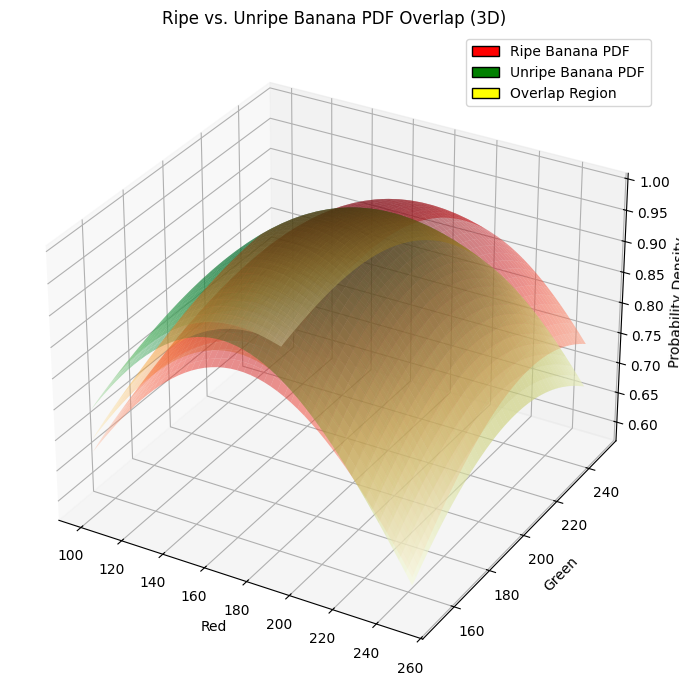

The estimated probability that a ripe and unripe banana share the same color is 95.22%


In [ ]:
# Define Gaussian parameters - arbitrary banana colour distributions for examples sake
mean1 = [180, 200, 50]
cov1 = np.array([[10000, 2000, 500], [2000, 10000, 500], [500, 500, 10000]])
rv1 = multivariate_normal(mean1, cov1)

mean2 = [170, 190, 40]
cov2 = np.array([[10000, 2000, 500], [2000, 10000, 500], [500, 500, 10000]])
rv2 = multivariate_normal(mean2, cov2)

def banana_pdf(R, G, B, mean, cov):
  ''' Returns the probability density at any given RGB point.'''
  return multivariate_normal.pdf([R, G, B], mean, cov)

# Make ripe and unripe one using their specific means and covariances
ripe_banana_pdf = lambda R, G, B: banana_pdf(R, G, B, mean1, cov1)
unripe_banana_pdf = lambda R, G, B: banana_pdf(R, G, B, mean2, cov2)

# Create a 2D grid of red and green, since blue will be fixed
r = np.linspace(100, 250, 50)
g = np.linspace(150, 250, 50)
R, G = np.meshgrid(r, g)
B_fixed = 75

# Find the probability densities at each point
pdf1 = np.array([ripe_banana_pdf(R_val, G_val, B_fixed) for R_val, G_val in zip(R.ravel(), G.ravel())]).reshape(R.shape)
pdf2 = np.array([unripe_banana_pdf(R_val, G_val, B_fixed) for R_val, G_val in zip(R.ravel(), G.ravel())]).reshape(R.shape)

# Find the overlap of the PDFs
overlap_region = np.minimum(pdf1, pdf2)

# Normalizing the PDFs so their max values are 1
pdf1 /= np.max(pdf1)
pdf2 /= np.max(pdf2)
overlap_region /= np.max(overlap_region)

# Plot in 3D, making ripe bananas red, unripe bananas green, and the overlap yellow
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_surface(R, G, pdf1, cmap='Reds', alpha=0.5, edgecolor='none')
surf2 = ax.plot_surface(R, G, pdf2, cmap='Greens', alpha=0.5, edgecolor='none')
surf_overlap = ax.plot_surface(R, G, overlap_region, cmap='YlOrBr', alpha=0.3, edgecolor='none')

ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Probability Density")
ax.set_title("Ripe vs. Unripe Banana PDF Overlap (3D)")

# Legend using proxy artists
from matplotlib.patches import Patch
legend_elements = [
	Patch(facecolor='red', edgecolor='black', label='Ripe Banana PDF'),
	Patch(facecolor='green', edgecolor='black', label='Unripe Banana PDF'),
	Patch(facecolor='yellow', edgecolor='black', label='Overlap Region')
]
ax.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
plt.show()

# Estimate probability using Monte Carlo
mc = MonteCarloRGB(100, 250, 150, 250, 0, 150, 100000, ripe_banana_pdf, unripe_banana_pdf)
overlap_probability = mc.estimate_probability()
print(f"The estimated probability that a ripe and unripe banana share the same color is {round(overlap_probability*100, 2)}%")

These examples show that Monte Carlo integration is a powerful model for integrating otherwise tough to integrate functions. In such cases, finding an integral analytically may be far more time consuming or not even possible. However, as a computational method, it is able to do far more than analytic methods could, and even with a rough and arbitrary model such as the banana one, it tells us information we wouldn't be able to find analytically.

Acknowledgments:
Some aspects of this code was designed and debugged with assistance from ChatGPT, an AI language model developed by OpenAI.